In [1]:
import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('covidnig.csv')

In [3]:
data.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"26,708","2,435","24,037",236
1,FCT,"9,627","2,840","6,694",93
2,Kaduna,"4,504",579,"3,877",48
3,Plateau,"4,262",280,"3,948",34
4,Oyo,"3,788",368,"3,374",46


In [4]:
data.shape

(37, 5)

In [5]:
data.dtypes

States Affected                 object
No. of Cases (Lab Confirmed)    object
No. of Cases (on admission)     object
No. Discharged                  object
No. of Deaths                    int64
dtype: object

In [6]:
data.describe()

,No. of Deaths
count,37.000000
mean,33.000000
std,41.797794
min,2.000000
25%,11.000000
50%,21.000000
75%,36.000000
max,236.000000


In [7]:
data.isnull().sum()

States Affected                 0
No. of Cases (Lab Confirmed)    0
No. of Cases (on admission)     0
No. Discharged                  0
No. of Deaths                   0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ KB


In [9]:
data.duplicated().any()

False

In [10]:
column_names = ['states', 'Lab Confirmed', 'On Admission', 'No. Discharged', 'No. of Deaths']

In [11]:
data.columns = column_names

In [12]:
data.head()

,states,Lab Confirmed,On Admission,No. Discharged,No. of Deaths
0,Lagos,"26,708","2,435","24,037",236
1,FCT,"9,627","2,840","6,694",93
2,Kaduna,"4,504",579,"3,877",48
3,Plateau,"4,262",280,"3,948",34
4,Oyo,"3,788",368,"3,374",46


In [13]:
data['Lab Confirmed'] = data['Lab Confirmed'].str.replace(',','').astype(int)
data['On Admission'] = data['On Admission'].str.replace(',','').astype(int)
data['No. Discharged'] = data['No. Discharged'].str.replace(',','').astype(int)

In [14]:
data.head()

,states,Lab Confirmed,On Admission,No. Discharged,No. of Deaths
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
2,Kaduna,4504,579,3877,48
3,Plateau,4262,280,3948,34
4,Oyo,3788,368,3374,46


In [15]:
data.nlargest(10, 'Lab Confirmed', keep='first')

,states,Lab Confirmed,On Admission,No. Discharged,No. of Deaths
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
2,Kaduna,4504,579,3877,48
3,Plateau,4262,280,3948,34
4,Oyo,3788,368,3374,46
5,Rivers,3279,232,2987,60
6,Edo,2768,52,2603,113
7,Ogun,2382,174,2175,33
8,Kano,2032,198,1778,56
9,Delta,1843,57,1737,49


In [16]:
Top_10_States = data.nlargest(10, 'Lab Confirmed', keep='first')

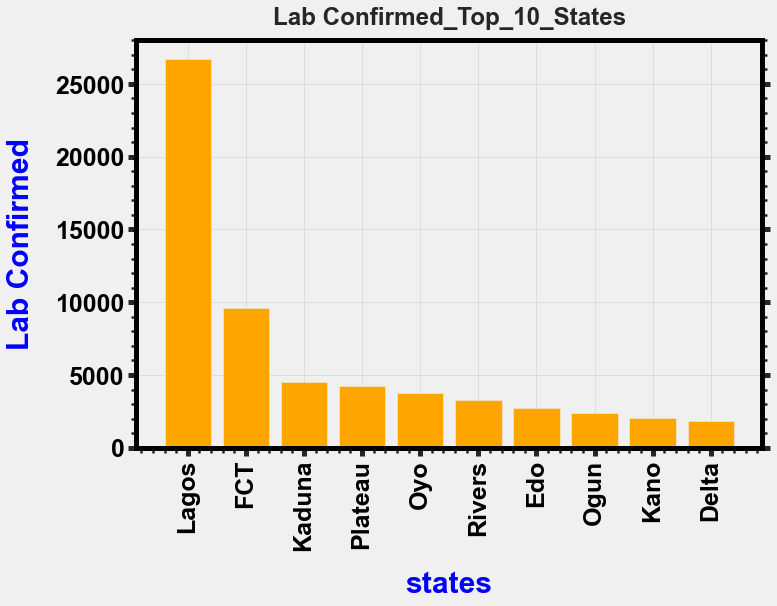

In [17]:
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(1, 1, 1)
ax.bar(Top_10_States['states'], Top_10_States['Lab Confirmed'], color = 'orange')
plt.minorticks_on()
ax.tick_params(direction = 'out', axis = 'both', which = 'major', length = 8, 
width = 5, grid_alpha = 0.5, labelcolor = 'k', labelsize = 20, bottom = True, left = True, right = True)
ax.tick_params(direction = 'out', axis = 'both', which = 'minor', length = 5, 
width = 2.5, grid_alpha = 0.5, labelcolor = 'k', labelsize = 20, bottom = True, left = True, right = True)
plt.xlabel('states', fontweight = 'bold', fontsize = 30, color = 'blue', labelpad = 20)
plt.ylabel('Lab Confirmed', fontweight = 'bold', fontsize = 30, color = 'blue', labelpad = 20)
plt.xticks(fontsize = 25, fontweight = 'bold', rotation = 90)
plt.yticks(fontsize = 25, fontweight = 'bold')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_linewidth(5)
ax.spines['right'].set_linewidth(5)
ax.spines['top'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
plt.title('Lab Confirmed_Top_10_States', fontweight = 'bold', fontsize = 'xx-large', pad = 15)


plt.plot()
plt.show()


In [18]:
# Lagos State had the highest Laboratory Confirmed cases of covid-19

In [19]:
Top_10_nsmallest_Confirmed = data.nsmallest(10, 'Lab Confirmed', keep='first')

In [20]:
Top_10_nsmallest_Confirmed

,states,Lab Confirmed,On Admission,No. Discharged,No. of Deaths
36,Kogi,5,0,3,2
35,Zamfara,79,1,73,5
34,Cross River,93,1,81,11
33,Kebbi,143,5,130,8
32,Yobe,164,33,123,8
31,Taraba,203,19,177,7
30,Sokoto,228,40,171,17
29,Anambra,299,6,274,19
28,Adamawa,355,96,238,21
27,Niger,381,69,300,12


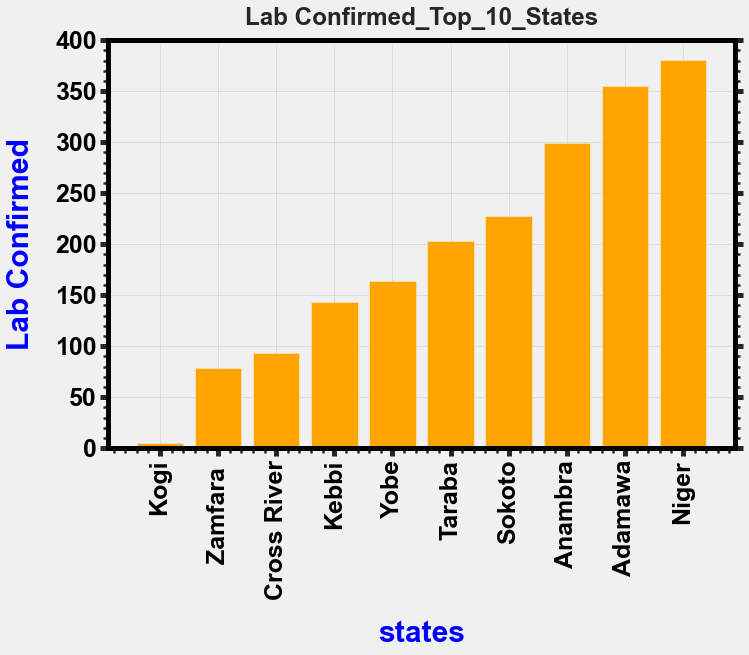

In [21]:
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(1, 1, 1)
ax.bar(Top_10_nsmallest_Confirmed['states'], Top_10_nsmallest_Confirmed['Lab Confirmed'], color = 'orange')
plt.minorticks_on()
ax.tick_params(direction = 'out', axis = 'both', which = 'major', length = 8, 
width = 5, grid_alpha = 0.5, labelcolor = 'k', labelsize = 20, bottom = True, left = True, right = True)
ax.tick_params(direction = 'out', axis = 'both', which = 'minor', length = 5, 
width = 2.5, grid_alpha = 0.5, labelcolor = 'k', labelsize = 20, bottom = True, left = True, right = True)
plt.xlabel('states', fontweight = 'bold', fontsize = 30, color = 'blue', labelpad = 20)
plt.ylabel('Lab Confirmed', fontweight = 'bold', fontsize = 30, color = 'blue', labelpad = 20)
plt.xticks(fontsize = 25, fontweight = 'bold', rotation = 90)
plt.yticks(fontsize = 25, fontweight = 'bold')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_linewidth(5)
ax.spines['right'].set_linewidth(5)
ax.spines['top'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
plt.title('Lab Confirmed_Top_10_States', fontweight = 'bold', fontsize = 'xx-large', pad = 15)


plt.plot()
plt.show()

In [22]:
# While Kogi State recorded lowest Laboratory confirmed cases of covid-19

In [23]:
data.nlargest(10, 'No. Discharged', keep='first')

,states,Lab Confirmed,On Admission,No. Discharged,No. of Deaths
0,Lagos,26708,2435,24037,236
1,FCT,9627,2840,6694,93
3,Plateau,4262,280,3948,34
2,Kaduna,4504,579,3877,48
4,Oyo,3788,368,3374,46
5,Rivers,3279,232,2987,60
6,Edo,2768,52,2603,113
7,Ogun,2382,174,2175,33
8,Kano,2032,198,1778,56
9,Delta,1843,57,1737,49


In [24]:
Top_10_States_No_of_Discharged = data.nlargest(10, 'No. Discharged', keep='first')

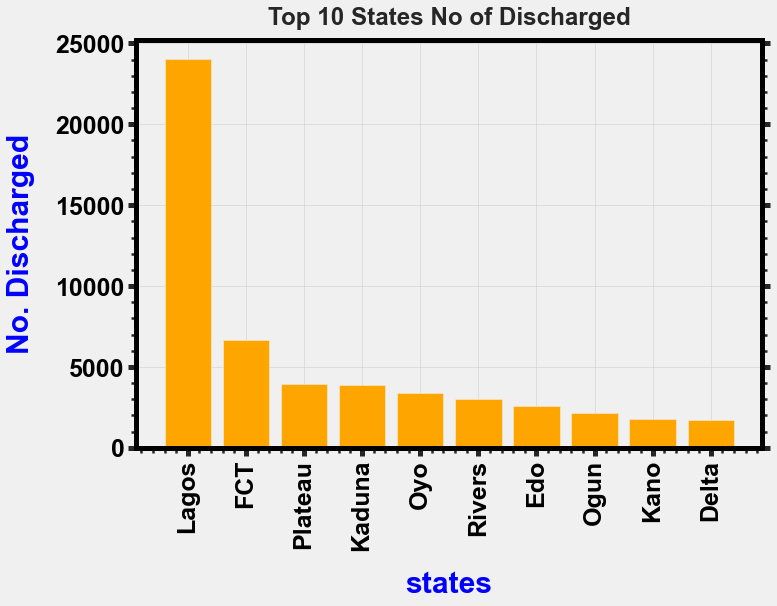

In [25]:
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(1, 1, 1)
ax.bar(Top_10_States_No_of_Discharged['states'], Top_10_States_No_of_Discharged['No. Discharged'], color = 'orange')
plt.minorticks_on()
ax.tick_params(direction = 'out', axis = 'both', which = 'major', length = 8, 
width = 5, grid_alpha = 0.5, labelcolor = 'k', labelsize = 20, bottom = True, left = True, right = True)
ax.tick_params(direction = 'out', axis = 'both', which = 'minor', length = 5, 
width = 2.5, grid_alpha = 0.5, labelcolor = 'k', labelsize = 20, bottom = True, left = True, right = True)
plt.xlabel('states', fontweight = 'bold', fontsize = 30, color = 'blue', labelpad = 20)
plt.ylabel('No. Discharged', fontweight = 'bold', fontsize = 30, color = 'blue', labelpad = 20)
plt.xticks(fontsize = 25, fontweight = 'bold', rotation = 90)
plt.yticks(fontsize = 25, fontweight = 'bold')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_linewidth(5)
ax.spines['right'].set_linewidth(5)
ax.spines['top'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
plt.title('Top 10 States No of Discharged', fontweight = 'bold', fontsize = 'xx-large', pad = 15)


plt.plot()
plt.show()




In [26]:
# Lagos State had the highest Number of Discharged people from covid-19 Isolation Centers 

In [27]:
Top_10_nsmallest_Discharged = data.nsmallest(10, 'No. Discharged', keep='first')

In [28]:
Top_10_nsmallest_Discharged

,states,Lab Confirmed,On Admission,No. Discharged,No. of Deaths
36,Kogi,5,0,3,2
35,Zamfara,79,1,73,5
34,Cross River,93,1,81,11
32,Yobe,164,33,123,8
33,Kebbi,143,5,130,8
30,Sokoto,228,40,171,17
31,Taraba,203,19,177,7
28,Adamawa,355,96,238,21
29,Anambra,299,6,274,19
27,Niger,381,69,300,12


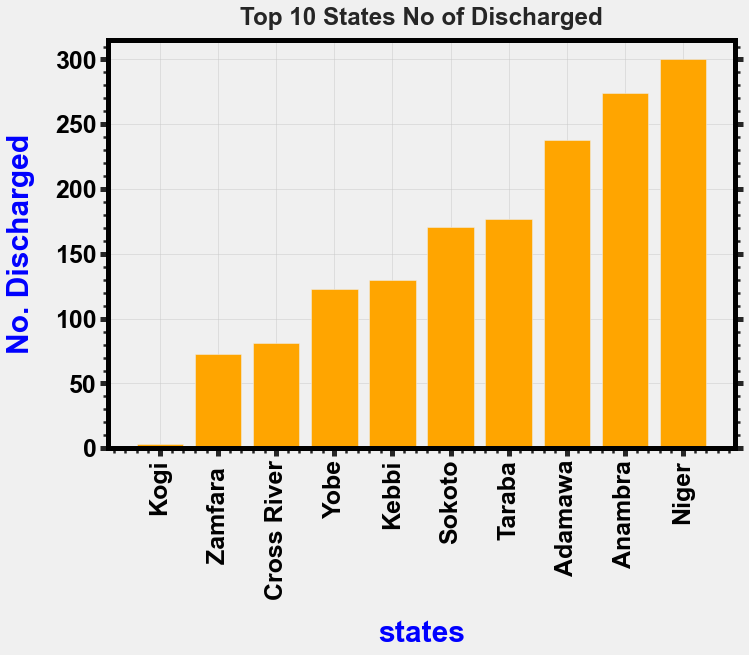

In [29]:
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(1, 1, 1)
ax.bar(Top_10_nsmallest_Discharged['states'], Top_10_nsmallest_Discharged['No. Discharged'], color = 'orange')
plt.minorticks_on()
ax.tick_params(direction = 'out', axis = 'both', which = 'major', length = 8, 
width = 5, grid_alpha = 0.5, labelcolor = 'k', labelsize = 20, bottom = True, left = True, right = True)
ax.tick_params(direction = 'out', axis = 'both', which = 'minor', length = 5, 
width = 2.5, grid_alpha = 0.5, labelcolor = 'k', labelsize = 20, bottom = True, left = True, right = True)
plt.xlabel('states', fontweight = 'bold', fontsize = 30, color = 'blue', labelpad = 20)
plt.ylabel('No. Discharged', fontweight = 'bold', fontsize = 30, color = 'blue', labelpad = 20)
plt.xticks(fontsize = 25, fontweight = 'bold', rotation = 90)
plt.yticks(fontsize = 25, fontweight = 'bold')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_linewidth(5)
ax.spines['right'].set_linewidth(5)
ax.spines['top'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
plt.title('Top 10 States No of Discharged', fontweight = 'bold', fontsize = 'xx-large', pad = 15)


plt.plot()
plt.show()

In [30]:
# Kogi State had the lowest No of Discharged people from covid-19

In [31]:
data.nlargest(10, 'No. of Deaths', keep='first')

,states,Lab Confirmed,On Admission,No. Discharged,No. of Deaths
0,Lagos,26708,2435,24037,236
6,Edo,2768,52,2603,113
1,FCT,9627,2840,6694,93
5,Rivers,3279,232,2987,60
8,Kano,2032,198,1778,56
9,Delta,1843,57,1737,49
2,Kaduna,4504,579,3877,48
4,Oyo,3788,368,3374,46
10,Ondo,1793,62,1690,41
19,Borno,778,37,705,36


In [32]:
Top_10_States_No_of_Deaths = data.nlargest(10, 'No. of Deaths', keep='first')

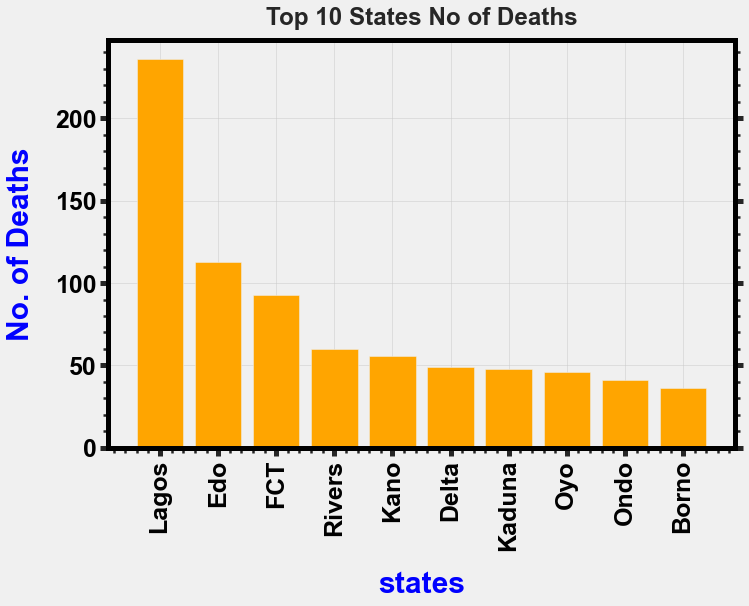

In [33]:
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(1, 1, 1)
ax.bar(Top_10_States_No_of_Deaths['states'], Top_10_States_No_of_Deaths['No. of Deaths'], color = 'orange')
plt.minorticks_on()
ax.tick_params(direction = 'out', axis = 'both', which = 'major', length = 8, 
width = 5, grid_alpha = 0.5, labelcolor = 'k', labelsize = 20, bottom = True, left = True, right = True)
ax.tick_params(direction = 'out', axis = 'both', which = 'minor', length = 5, 
width = 2.5, grid_alpha = 0.5, labelcolor = 'k', labelsize = 20, bottom = True, left = True, right = True)
plt.xlabel('states', fontweight = 'bold', fontsize = 30, color = 'blue', labelpad = 20)
plt.ylabel('No. of Deaths', fontweight = 'bold', fontsize = 30, color = 'blue', labelpad = 20)
plt.xticks(fontsize = 25, fontweight = 'bold', rotation = 90)
plt.yticks(fontsize = 25, fontweight = 'bold')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_linewidth(5)
ax.spines['right'].set_linewidth(5)
ax.spines['top'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
plt.title('Top 10 States No of Deaths', fontweight = 'bold', fontsize = 'xx-large', pad = 15)


plt.plot()
plt.show()

In [34]:
# Lagos State recorded the highest No of Deaths of people with covid-19

In [35]:
Top_10_nsmallest_deaths = data.nsmallest(10, 'No. of Deaths', keep='first')

In [36]:
Top_10_nsmallest_deaths

,states,Lab Confirmed,On Admission,No. Discharged,No. of Deaths
36,Kogi,5,0,3,2
35,Zamfara,79,1,73,5
24,Ekiti,405,24,375,6
31,Taraba,203,19,177,7
32,Yobe,164,33,123,8
33,Kebbi,143,5,130,8
25,Akwa Ibom,395,44,342,9
16,Abia,980,25,945,10
22,Benue,515,44,460,11
26,Jigawa,386,57,318,11


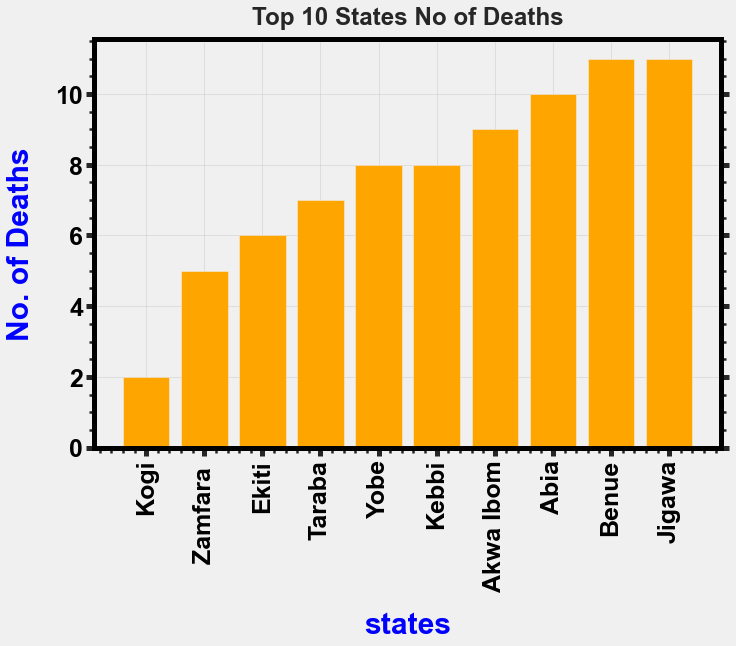

In [37]:
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(1, 1, 1)
ax.bar(Top_10_nsmallest_deaths['states'], Top_10_nsmallest_deaths['No. of Deaths'], color = 'orange')
plt.minorticks_on()
ax.tick_params(direction = 'out', axis = 'both', which = 'major', length = 8, 
width = 5, grid_alpha = 0.5, labelcolor = 'k', labelsize = 20, bottom = True, left = True, right = True)
ax.tick_params(direction = 'out', axis = 'both', which = 'minor', length = 5, 
width = 2.5, grid_alpha = 0.5, labelcolor = 'k', labelsize = 20, bottom = True, left = True, right = True)
plt.xlabel('states', fontweight = 'bold', fontsize = 30, color = 'blue', labelpad = 20)
plt.ylabel('No. of Deaths', fontweight = 'bold', fontsize = 30, color = 'blue', labelpad = 20)
plt.xticks(fontsize = 25, fontweight = 'bold', rotation = 90)
plt.yticks(fontsize = 25, fontweight = 'bold')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_linewidth(5)
ax.spines['right'].set_linewidth(5)
ax.spines['top'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
plt.title('Top 10 States No of Deaths', fontweight = 'bold', fontsize = 'xx-large', pad = 15)


plt.plot()
plt.show()

In [38]:
# Kogi State recorded the lowest No of Deaths of people with covid-19

In [39]:
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [40]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [41]:
confirmed['Country/Region'] == 'Nigeria'

0      False
1      False
2      False
3      False
4      False
       ...  
284    False
285    False
286    False
287    False
288    False
Name: Country/Region, Length: 289, dtype: bool

In [42]:
dfc = confirmed[confirmed['Country/Region'] == 'Nigeria']

In [43]:
dfc

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
206,NaN,Nigeria,9.082,8.6753,0,0,0,0,0,0,...,266593,266598,266598,266598,266598,266598,266598,266598,266598,266598


In [44]:
confirmed.iloc[206]

Province/State        NaN
Country/Region    Nigeria
Lat                 9.082
Long               8.6753
1/22/20                 0
                   ...   
3/5/23             266598
3/6/23             266598
3/7/23             266598
3/8/23             266598
3/9/23             266598
Name: 206, Length: 1147, dtype: object

In [45]:
dfconfirmed = confirmed.iloc[206].drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis = 0).reset_index()

In [46]:
dfconfirmed

,index,206
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,0
...,...,...
1138,3/5/23,266598
1139,3/6/23,266598
1140,3/7/23,266598
1141,3/8/23,266598


In [47]:
dfconfirmed.columns = ['Date', 'Cases']

In [48]:
dfconfirmed

,Date,Cases
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,0
...,...,...
1138,3/5/23,266598
1139,3/6/23,266598
1140,3/7/23,266598
1141,3/8/23,266598


In [49]:
import datetime as dt

In [50]:
dfconfirmed['Date'] = pd.to_datetime(dfconfirmed['Date'])

In [51]:
dfconfirmed

,Date,Cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
1138,2023-03-05,266598
1139,2023-03-06,266598
1140,2023-03-07,266598
1141,2023-03-08,266598


In [52]:
dfconfirmed.duplicated().any()

False

In [53]:
dfconfirmed.isnull().sum()

Date     0
Cases    0
dtype: int64

In [54]:
dfconfirmed.groupby(['Date'])['Cases'].sum()

Date
2020-01-22         0
2020-01-23         0
2020-01-24         0
2020-01-25         0
2020-01-26         0
               ...  
2023-03-05    266598
2023-03-06    266598
2023-03-07    266598
2023-03-08    266598
2023-03-09    266598
Name: Cases, Length: 1143, dtype: object

In [55]:
confirmed_cases = (dfconfirmed.groupby('Date').sum()).sort_values(by = 'Cases', ascending = False).head(10).reset_index()

In [56]:
confirmed_cases

,Date,Cases
0,2023-03-09,266598
1,2023-03-08,266598
2,2023-03-07,266598
3,2023-03-06,266598
4,2023-03-05,266598
5,2023-03-04,266598
6,2023-03-03,266598
7,2023-03-02,266598
8,2023-03-01,266598
9,2023-02-28,266593


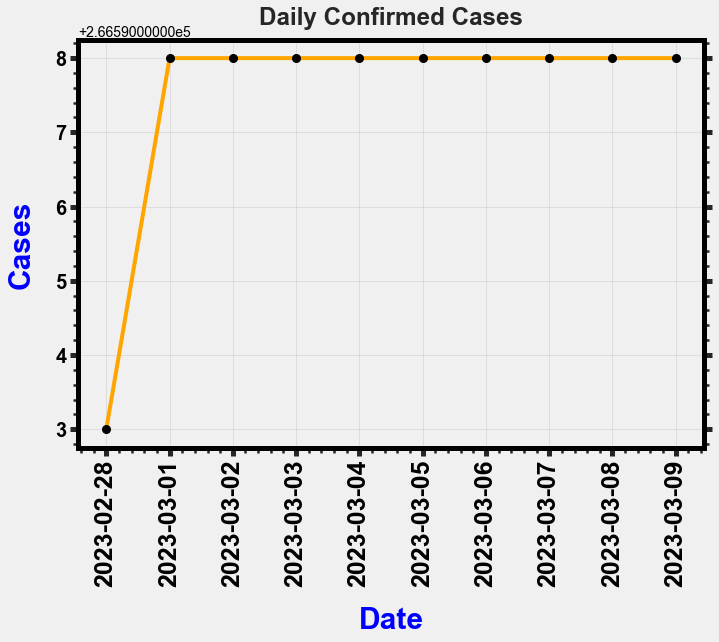

In [57]:
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(1, 1, 1)
ax.plot(confirmed_cases['Date'], confirmed_cases['Cases'], color = 'orange',marker = 'o', ms = '8', mec = 'k', mfc ='k' )
plt.minorticks_on()
ax.tick_params(direction = 'out', axis = 'both', which = 'major', length = 8, 
width = 5, grid_alpha = 0.5, labelcolor = 'k', labelsize = 20, bottom = True, left = True, right = True)
ax.tick_params(direction = 'out', axis = 'both', which = 'minor', length = 5, 
width = 2.5, grid_alpha = 0.5, labelcolor = 'k', labelsize = 20, bottom = True, left = True, right = True)
plt.xlabel('Date', fontweight = 'bold', fontsize = 30, color = 'blue', labelpad = 20)
plt.ylabel('Cases', fontweight = 'bold', fontsize = 30, color = 'blue', labelpad = 20)
plt.xticks(fontsize = 25, fontweight = 'bold', rotation = 90)
plt.yticks(fontsize = 20, fontweight = 'bold')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_linewidth(5)
ax.spines['right'].set_linewidth(5)
ax.spines['top'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
plt.title('Daily Confirmed Cases', fontweight = 'bold', fontsize = 'xx-large', pad = 15)


plt.plot()
plt.show()


In [58]:
# The rate of daily Confirmed Cases of covid-19 was much higher in March, 2023

In [59]:
recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [60]:
recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
recovered['Country/Region'] == 'Nigeria'

0      False
1      False
2      False
3      False
4      False
       ...  
269    False
270    False
271    False
272    False
273    False
Name: Country/Region, Length: 274, dtype: bool

In [62]:
dfr = recovered[recovered['Country/Region'] == 'Nigeria']

In [63]:
dfr

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
191,NaN,Nigeria,9.082,8.6753,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
recovered.iloc[191]

Province/State        NaN
Country/Region    Nigeria
Lat                 9.082
Long               8.6753
1/22/20                 0
                   ...   
3/5/23                  0
3/6/23                  0
3/7/23                  0
3/8/23                  0
3/9/23                  0
Name: 191, Length: 1147, dtype: object

In [65]:
dfrecovered = recovered.iloc[191].drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis = 0).reset_index()

In [66]:
dfrecovered

,index,191
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,0
...,...,...
1138,3/5/23,0
1139,3/6/23,0
1140,3/7/23,0
1141,3/8/23,0


In [67]:
dfrecovered.columns = ['Date', 'Cases']

In [68]:
dfrecovered

,Date,Cases
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,0
...,...,...
1138,3/5/23,0
1139,3/6/23,0
1140,3/7/23,0
1141,3/8/23,0


In [69]:
import datetime as dt

In [70]:
dfrecovered['Date'] = pd.to_datetime(dfrecovered['Date'])

In [71]:
dfrecovered

,Date,Cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
1138,2023-03-05,0
1139,2023-03-06,0
1140,2023-03-07,0
1141,2023-03-08,0


In [72]:
dfrecovered.duplicated().any()

False

In [73]:
dfrecovered.isnull().sum()

Date     0
Cases    0
dtype: int64

In [74]:
dfrecovered.groupby(['Date'])['Cases'].sum()

Date
2020-01-22    0
2020-01-23    0
2020-01-24    0
2020-01-25    0
2020-01-26    0
             ..
2023-03-05    0
2023-03-06    0
2023-03-07    0
2023-03-08    0
2023-03-09    0
Name: Cases, Length: 1143, dtype: object

In [75]:
recovered_cases = (dfrecovered.groupby('Date').sum()).sort_values(by = 'Cases', ascending = False).head(10).reset_index()

In [76]:
recovered_cases

,Date,Cases
0,2021-08-04,165208
1,2021-08-03,165122
2,2021-08-02,165037
3,2021-08-01,165005
4,2021-07-31,164994
5,2021-07-30,164978
6,2021-07-29,164930
7,2021-07-28,164886
8,2021-07-27,164837
9,2021-07-26,164798


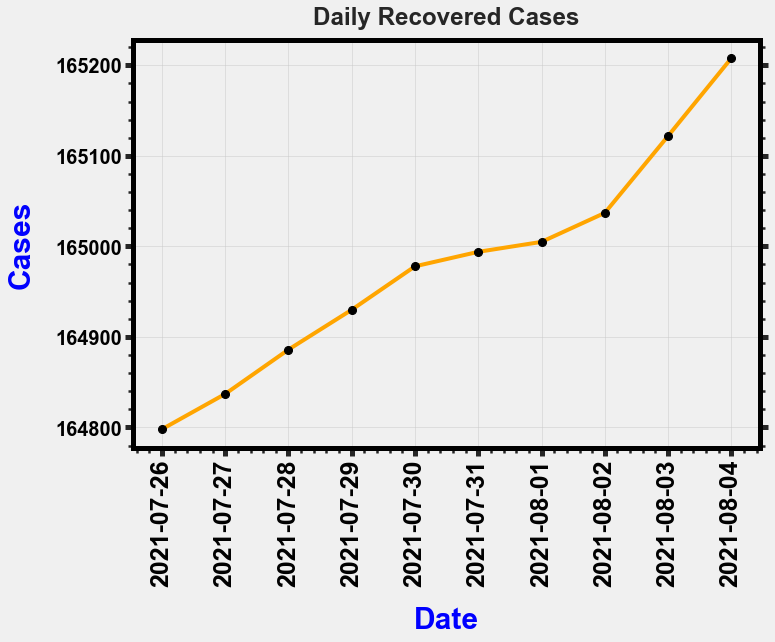

In [77]:
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(1, 1, 1)
ax.plot(recovered_cases['Date'], recovered_cases['Cases'], color = 'orange',marker = 'o', ms = '8', mec = 'k', mfc ='k' )
plt.minorticks_on()
ax.tick_params(direction = 'out', axis = 'both', which = 'major', length = 8, 
width = 5, grid_alpha = 0.5, labelcolor = 'k', labelsize = 20, bottom = True, left = True, right = True)
ax.tick_params(direction = 'out', axis = 'both', which = 'minor', length = 5, 
width = 2.5, grid_alpha = 0.5, labelcolor = 'k', labelsize = 20, bottom = True, left = True, right = True)
plt.xlabel('Date', fontweight = 'bold', fontsize = 30, color = 'blue', labelpad = 20)
plt.ylabel('Cases', fontweight = 'bold', fontsize = 30, color = 'blue', labelpad = 20)
plt.xticks(fontsize = 25, fontweight = 'bold', rotation = 90)
plt.yticks(fontsize = 20, fontweight = 'bold')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_linewidth(5)
ax.spines['right'].set_linewidth(5)
ax.spines['top'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
plt.title('Daily Recovered Cases', fontweight = 'bold', fontsize = 'xx-large', pad = 15)


plt.plot()
plt.show()

In [78]:
# The rate of daily recovered cases of covid-19 started rising from July 2021 to August 2021.

In [79]:
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [80]:
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [81]:
deaths['Country/Region'] == 'Nigeria'

0      False
1      False
2      False
3      False
4      False
       ...  
284    False
285    False
286    False
287    False
288    False
Name: Country/Region, Length: 289, dtype: bool

In [82]:
dfd = deaths[deaths['Country/Region'] == 'Nigeria']

In [83]:
dfd

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
206,NaN,Nigeria,9.082,8.6753,0,0,0,0,0,0,...,3155,3155,3155,3155,3155,3155,3155,3155,3155,3155


In [84]:
deaths.iloc[206]

Province/State        NaN
Country/Region    Nigeria
Lat                 9.082
Long               8.6753
1/22/20                 0
                   ...   
3/5/23               3155
3/6/23               3155
3/7/23               3155
3/8/23               3155
3/9/23               3155
Name: 206, Length: 1147, dtype: object

In [85]:
dfdeaths = deaths.iloc[206].drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis = 0).reset_index()

In [86]:
dfdeaths

,index,206
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,0
...,...,...
1138,3/5/23,3155
1139,3/6/23,3155
1140,3/7/23,3155
1141,3/8/23,3155


In [87]:
dfdeaths.columns = ['Date', 'Cases']

In [88]:
dfdeaths

,Date,Cases
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,0
...,...,...
1138,3/5/23,3155
1139,3/6/23,3155
1140,3/7/23,3155
1141,3/8/23,3155


In [89]:
import datetime as dt

In [90]:
dfdeaths['Date'] = pd.to_datetime(dfdeaths['Date'])

In [91]:
dfdeaths

,Date,Cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
1138,2023-03-05,3155
1139,2023-03-06,3155
1140,2023-03-07,3155
1141,2023-03-08,3155


In [92]:
dfdeaths.duplicated().any()

False

In [93]:
dfdeaths.isnull().sum()

Date     0
Cases    0
dtype: int64

In [94]:
dfdeaths.groupby(['Date'])['Cases'].sum()

Date
2020-01-22       0
2020-01-23       0
2020-01-24       0
2020-01-25       0
2020-01-26       0
              ... 
2023-03-05    3155
2023-03-06    3155
2023-03-07    3155
2023-03-08    3155
2023-03-09    3155
Name: Cases, Length: 1143, dtype: object

In [95]:
deaths_cases = (dfdeaths.groupby('Date').sum()).sort_values(by = 'Cases', ascending = False).head(10).reset_index()

In [96]:
deaths_cases

,Date,Cases
0,2023-03-09,3155
1,2022-10-27,3155
2,2022-11-16,3155
3,2022-11-15,3155
4,2022-11-14,3155
5,2022-11-13,3155
6,2022-11-12,3155
7,2022-11-11,3155
8,2022-11-10,3155
9,2022-11-09,3155


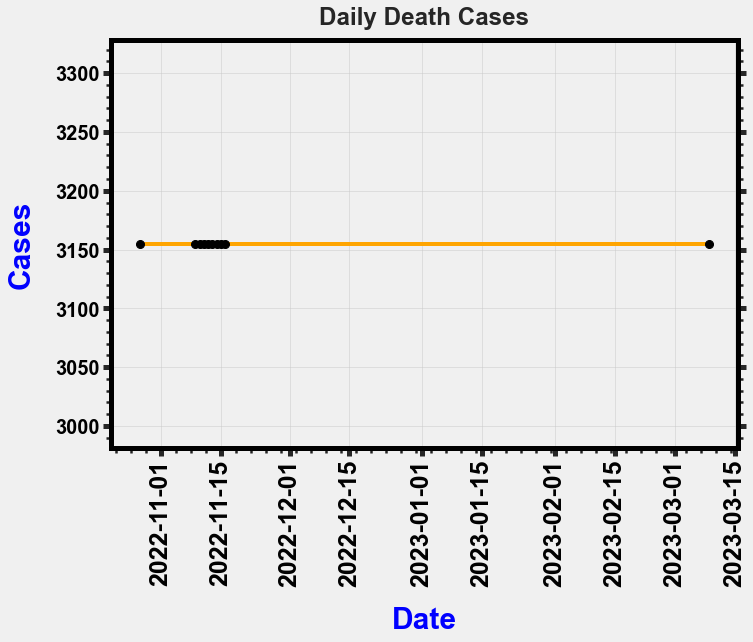

In [97]:
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(1, 1, 1)
ax.plot(deaths_cases['Date'], deaths_cases['Cases'], color = 'orange',marker = 'o', ms = '8', mec = 'k', mfc ='k' )
plt.minorticks_on()
ax.tick_params(direction = 'out', axis = 'both', which = 'major', length = 8, 
width = 5, grid_alpha = 0.5, labelcolor = 'k', labelsize = 20, bottom = True, left = True, right = True)
ax.tick_params(direction = 'out', axis = 'both', which = 'minor', length = 5, 
width = 2.5, grid_alpha = 0.5, labelcolor = 'k', labelsize = 20, bottom = True, left = True, right = True)
plt.xlabel('Date', fontweight = 'bold', fontsize = 30, color = 'blue', labelpad = 20)
plt.ylabel('Cases', fontweight = 'bold', fontsize = 30, color = 'blue', labelpad = 20)
plt.xticks(fontsize = 25, fontweight = 'bold', rotation = 90)
plt.yticks(fontsize = 20, fontweight = 'bold')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_linewidth(5)
ax.spines['right'].set_linewidth(5)
ax.spines['top'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
plt.title('Daily Death Cases', fontweight = 'bold', fontsize = 'xx-large', pad = 15)


plt.plot()
plt.show()

In [98]:
# The daily death cases from November 2022 to March 2023 remains the unchanged. There is no increase.

In [99]:
import pandas as pd

In [100]:
external = pd.read_csv('covid_external.csv')

In [101]:
external.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [102]:
external.shape

(37, 12)

In [103]:
pd.merge(external, data, on=['states'])

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR,Lab Confirmed,On Admission,No. Discharged,No. of Deaths
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79,9627,2840,6694,93
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93,4262,280,3948,34
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93,1296,171,1094,31
3,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84,381,69,300,12
4,Benue,North Central,6376000,0.5,0.7,0.5,0.7,0.4,0.4,0.3,0.5,0.91,515,44,460,11
5,Kogi,North Central,4970000,0.1,0.3,0.2,0.5,0.5,0.4,0.3,0.6,0.87,5,0,3,2
6,Bauchi,North East,7270000,0.8,0.1,0.2,0.8,0.8,0.2,0.8,0.8,0.85,897,108,775,14
7,Gombe,North East,3692000,1.0,0.4,0.4,0.9,0.9,0.3,0.8,0.7,0.83,1164,183,950,31
8,Borno,North East,6651000,0.9,0.3,0.1,1.0,1.0,0.1,0.7,0.9,0.89,778,37,705,36
9,Adamawa,North East,4672000,0.8,0.5,0.6,0.9,0.7,0.3,0.7,0.6,0.94,355,96,238,21


In [104]:
data_ex = pd.merge(external, data, on=['states'])

In [105]:
external_data = data_ex.nlargest(10, 'Overall CCVI Index', keep='first')

In [106]:
external_data

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR,Lab Confirmed,On Admission,No. Discharged,No. of Deaths
7,Gombe,North East,3692000,1.0,0.4,0.4,0.9,0.9,0.3,0.8,0.7,0.83,1164,183,950,31
10,Yobe,North East,3723000,1.0,0.6,0.3,1.0,0.5,0.0,0.9,1.0,0.87,164,33,123,8
8,Borno,North East,6651000,0.9,0.3,0.1,1.0,1.0,0.1,0.7,0.9,0.89,778,37,705,36
15,Jigawa,North West,6435000,0.9,0.4,0.0,0.7,0.6,0.5,0.9,0.8,0.92,386,57,318,11
16,Sokoto,North West,5612000,0.9,0.3,0.2,0.4,0.7,0.3,1.0,1.0,0.89,228,40,171,17
6,Bauchi,North East,7270000,0.8,0.1,0.2,0.8,0.8,0.2,0.8,0.8,0.85,897,108,775,14
9,Adamawa,North East,4672000,0.8,0.5,0.6,0.9,0.7,0.3,0.7,0.6,0.94,355,96,238,21
11,Taraba,North East,3387000,0.8,0.6,0.8,0.9,0.5,0.0,0.7,0.9,0.86,203,19,177,7
17,Kebbi,North West,4968000,0.8,0.2,0.3,0.4,0.9,0.1,0.9,0.9,0.85,143,5,130,8
13,Kaduna,North West,9227000,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86,4504,579,3877,48


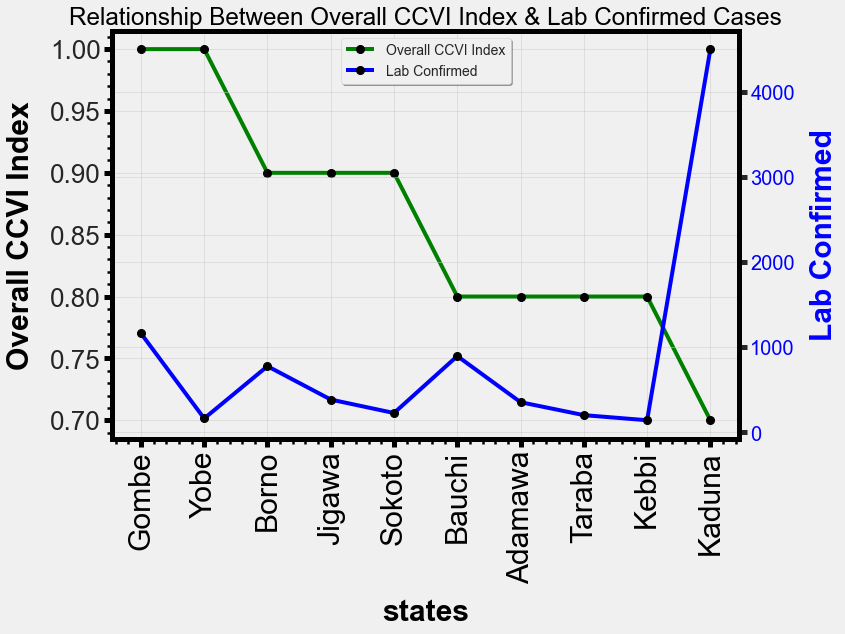

In [107]:
fig = plt.figure(figsize = (10, 7))
ax1 = fig.add_subplot()
color1 = 'green'
line1, = ax1.plot(external_data['states'], external_data['Overall CCVI Index'], 
color = color1, marker = 'o', ms = '8', mec = 'k', mfc ='k')
plt.minorticks_on()
ax1.set_xlabel('states', color = 'black', fontweight = 'bold', fontsize = 30, labelpad = 15)
ax1.set_ylabel('Overall CCVI Index', color = 'k', fontweight = 'bold', fontsize = 30, labelpad = 15)
ax1.tick_params(direction = 'out', length=8, width=5, color = 'k', grid_alpha=0.5, 
axis = 'both', labelsize = 30, which = 'major', bottom = True)
ax1.tick_params(axis = 'x', labelcolor = 'black', labelrotation = 90)
ax1.tick_params(direction = 'out', length=5, width=2.5, color = 'k', grid_alpha=0.5, 
axis = 'both', labelsize = 30, which = 'minor', bottom = True)
ax1.tick_params(axis = 'y', labelsize = 26)

ax2 = ax1.twinx()
color2 = 'blue'
line2, = ax2.plot(external_data['states'], external_data['Lab Confirmed'], 
color = color2, marker = 'o', ms = '8', mec = 'k', mfc ='k')
ax2.set_ylabel('Lab Confirmed', color = color2, fontweight = 'bold', fontsize = 30, labelpad = 15)
ax2.tick_params(direction = 'out', length=8, width=5, grid_alpha=0.5, 
axis = 'y', labelcolor = color2, labelsize = 20, which = 'major', right = True)
ax2.tick_params(direction = 'out', length=5, width=2.5, grid_alpha=0.5, 
axis = 'y', labelcolor = color2, labelsize = 20, which = 'minor', right = True)
plt.title('Relationship Between Overall CCVI Index & Lab Confirmed Cases', fontsize = 'xx-large', color = 'black')
ax2.spines['left'].set_color('black')
ax2.spines['right'].set_color('black')
ax2.spines['top'].set_color('black')
ax2.spines['bottom'].set_color('black')
ax2.spines['left'].set_linewidth(5)
ax2.spines['right'].set_linewidth(5)
ax2.spines['top'].set_linewidth(5)
ax2.spines['bottom'].set_linewidth(5)
plt.legend([line1, line2], ['Overall CCVI Index', 'Lab Confirmed'], 
loc = 'upper center', fancybox = True, shadow = True, framealpha = 1)

plt.plot()
plt.show()

In [108]:
# Negative Relationship exists between the Overall Community Vulnerability Index(CCVI) and the Laboratory Confirmed Cases.
# As the Overall CCVI Index decreases, Laboratory Confirmed Cases surge.

In [109]:
import pandas as pd

In [110]:
budget = pd.read_csv('Budget data.csv')

In [111]:
budget

,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00
5,Bayelsa,242.18,183.15
6,Benue,189.00,119.00
7,Borno,146.80,108.80
8,Cross River,1100.00,147.10
9,Delta,395.50,282.30


In [112]:
new_budget = budget.sort_values(by = 'Initial_budget (Bn)', ascending = False).head(10)

In [113]:
new_budget

,states,Initial_budget (Bn),Revised_budget (Bn)
23,Lagos,1680.00,920.50
8,Cross River,1100.00,147.10
2,Akwa-Ibom,597.73,366.00
31,Rivers,530.80,300.40
26,Ogun,449.90,280.00
9,Delta,395.50,282.30
36,FCT,278.78,199.00
17,Kaduna,259.25,223.60
19,Katsina,244.00,213.00
5,Bayelsa,242.18,183.15


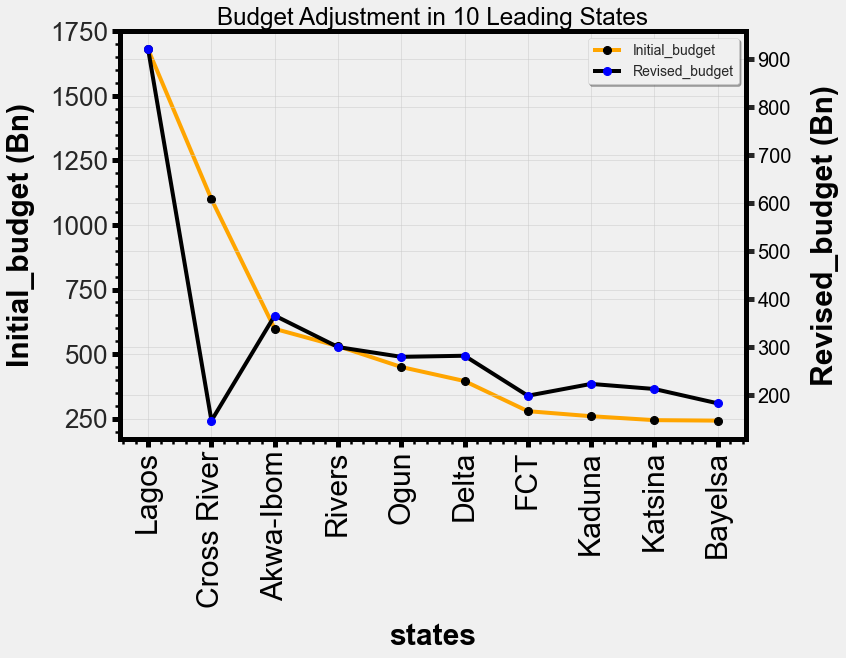

In [114]:
fig = plt.figure(figsize = (10, 7))
ax1 = fig.add_subplot()
color1 = 'orange'
line1, = ax1.plot(new_budget['states'], new_budget['Initial_budget (Bn)'], 
color = color1, marker = 'o', ms = '8', mec = 'k', mfc ='k')
plt.minorticks_on()
ax1.set_xlabel('states', color = 'black', fontweight = 'bold', fontsize = 30, labelpad = 15)
ax1.set_ylabel('Initial_budget (Bn)', color = 'black', fontweight = 'bold', fontsize = 30, labelpad = 15)
ax1.tick_params(direction = 'out', length=8, width=5, color = 'k', grid_alpha=0.5, 
axis = 'both', labelsize = 30, which = 'major', bottom = True, left = True, right = True)
ax1.tick_params(axis = 'x', labelcolor = 'black', labelrotation = 90)
ax1.tick_params(direction = 'out', length=5, width=2.5, color = 'k', grid_alpha=0.5, 
axis = 'both', labelsize = 30, which = 'minor', bottom = True, left = True, right = True)
ax1.tick_params(axis = 'y', labelsize = 26)

color2 = 'black'
ax2 = ax1.twinx()
line2, = ax2.plot(new_budget['states'], new_budget['Revised_budget (Bn)'], 
color = color2, marker = 'o', ms = '8', mec = 'b', mfc ='b')
ax2.set_ylabel('Revised_budget (Bn)', color = color2, fontweight = 'bold', fontsize = 30, labelpad = 20)
ax2.tick_params(direction = 'out', length=8, width=5, grid_alpha=0.5, 
axis = 'y', labelcolor = color2, labelsize = 20, which = 'major', right = True, bottom = True)
ax2.tick_params(direction = 'out', length=5, width=2.5, grid_alpha=0.5, 
axis = 'y', labelcolor = color2, labelsize = 30, which = 'minor', right = True, bottom = True)

ax2.spines['left'].set_color(color2)
ax2.spines['right'].set_color(color2)
ax2.spines['top'].set_color(color2)
ax2.spines['bottom'].set_color(color2)
ax2.spines['left'].set_linewidth(5)
ax2.spines['right'].set_linewidth(5)
ax2.spines['top'].set_linewidth(5)
ax2.spines['bottom'].set_linewidth(5)
plt.title('Budget Adjustment in 10 Leading States', fontsize = 'xx-large', color = color2)             
plt.legend([line1, line2], ['Initial_budget', 'Revised_budget'], framealpha = 1, fancybox = True, shadow = True)
plt.plot()
plt.show()

In [115]:
# The initial budgets of States were revised and reduced due to the effects of covid-19. And this had adverse effects on the
# economy

In [116]:
external_data.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR,Lab Confirmed,On Admission,No. Discharged,No. of Deaths
7,Gombe,North East,3692000,1.0,0.4,0.4,0.9,0.9,0.3,0.8,0.7,0.83,1164,183,950,31
10,Yobe,North East,3723000,1.0,0.6,0.3,1.0,0.5,0.0,0.9,1.0,0.87,164,33,123,8
8,Borno,North East,6651000,0.9,0.3,0.1,1.0,1.0,0.1,0.7,0.9,0.89,778,37,705,36
15,Jigawa,North West,6435000,0.9,0.4,0.0,0.7,0.6,0.5,0.9,0.8,0.92,386,57,318,11
16,Sokoto,North West,5612000,0.9,0.3,0.2,0.4,0.7,0.3,1.0,1.0,0.89,228,40,171,17


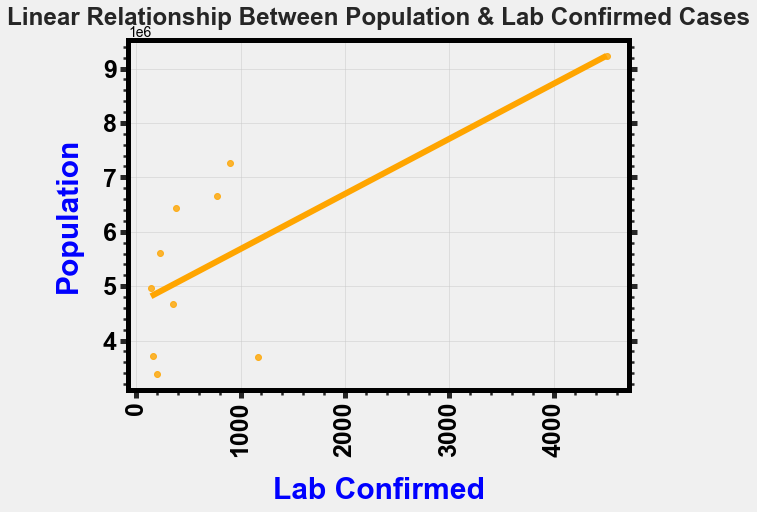

In [117]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(1, 1, 1)
sns.regplot(x = 'Lab Confirmed', y = 'Population', data = external_data, ci = None, color = 'orange')
plt.minorticks_on()
ax.tick_params(direction = 'out', axis = 'both', which = 'major', length = 8, 
width = 5, grid_alpha = 0.5, labelcolor = 'k', labelsize = 20, bottom = True, left = True, right = True)
ax.tick_params(direction = 'out', axis = 'both', which = 'minor', length = 5, 
width = 2.5, grid_alpha = 0.5, labelcolor = 'k', labelsize = 30, bottom = True, left = True, right = True)
plt.xlabel('Lab Confirmed', fontweight = 'bold', fontsize = 30, color = 'blue', labelpad = 20)
plt.ylabel('Population', fontweight = 'bold', fontsize = 30, color = 'blue', labelpad = 20)
plt.xticks(fontsize = 25, fontweight = 'bold', rotation = 90)
plt.yticks(fontsize = 25, fontweight = 'bold')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_linewidth(5)
ax.spines['right'].set_linewidth(5)
ax.spines['top'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
plt.title('Linear Relationship Between Population & Lab Confirmed Cases', fontweight = 'bold', fontsize = 'xx-large', pad = 15)


plt.plot()
plt.show()

In [118]:
# There was a positive relationship between Population and Laboratory Confirmed Cases. As Population
# increases(denser population), more people were infected with covid-19 virus

In [119]:
real_gdp = pd.read_csv('RealGDP.csv')

In [120]:
real_gdp

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


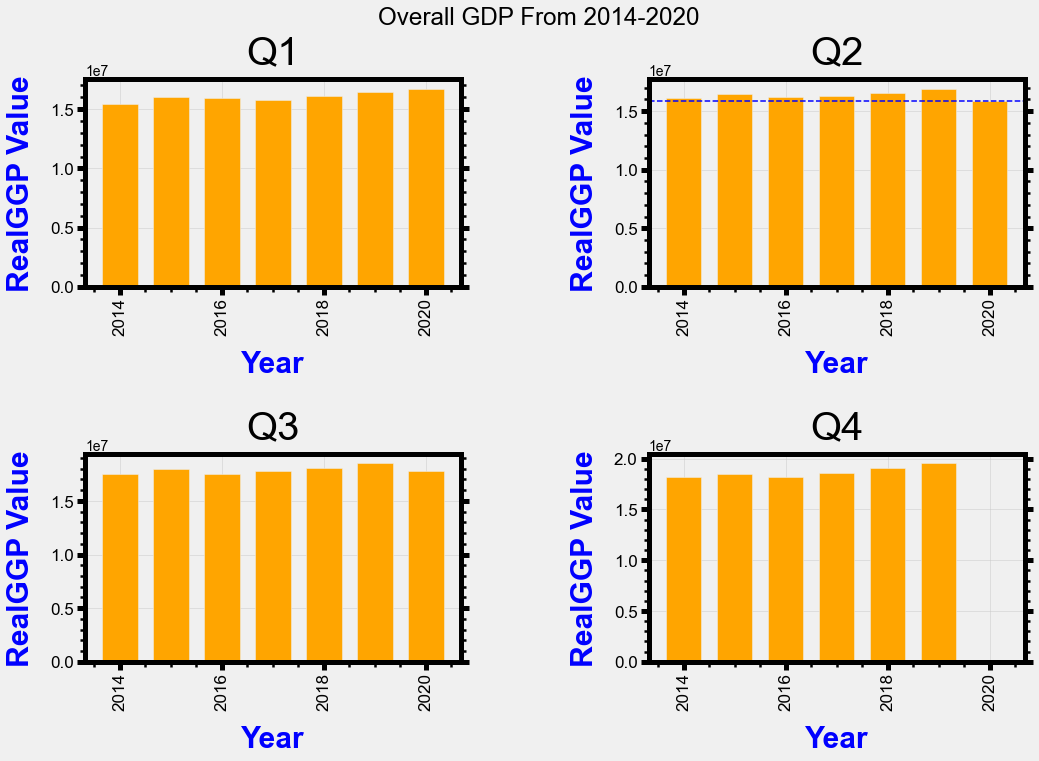

In [121]:
fig, ax = plt.subplots(2, 2, figsize = (15, 10))
ax1 = fig.add_subplot()
plt.subplots_adjust(wspace = 0.5, hspace = 0.8)
plt.suptitle('Overall GDP From 2014-2020', fontsize = 'xx-large', color = 'black')
ax1 = plt.subplot(2, 2, 1)
plt.minorticks_on()
ax1.bar(real_gdp['Year'], real_gdp['Q1'], width = 0.7, color = 'orange')
ax1.set_xlabel('Year', color = 'blue', fontweight = 'bold', fontsize = 30, labelpad = 15)
ax1.set_ylabel('RealGGP Value', color = 'blue', fontweight = 'bold', fontsize = 30, labelpad = 15)
ax1.tick_params(axis = 'x', labelcolor = 'black', labelrotation = 90)
ax1.tick_params(direction = 'out', length=8, width=5, grid_alpha=0.5, color = 'black', axis = 'both', 
labelcolor = 'black', labelsize = 17, pad = 3, which = 'major', bottom = True, right = True, left = True)
ax1.tick_params(direction = 'out', length=5, width=2.5, grid_alpha=0.5, color = 'black',axis = 'both', 
labelcolor = 'black', labelsize = 17, pad = 3, which = 'minor', bottom = True, left = True, right = True)
plt.title('Q1', fontsize = 40, color = 'black', pad = 15)
ax1.spines['left'].set_color('black')
ax1.spines['bottom'].set_color('black')
ax1.spines['right'].set_color('black')
ax1.spines['top'].set_color('black')
ax1.spines['left'].set_linewidth(5)
ax1.spines['right'].set_linewidth(5)
ax1.spines['top'].set_linewidth(5)
ax1.spines['bottom'].set_linewidth(5)


ax2 = plt.subplot(2, 2, 2)
plt.minorticks_on()
ax2.bar(real_gdp['Year'], real_gdp['Q2'], width = 0.7, color = 'orange')
plt.axhline(y = 15890000, color = 'blue', linestyle = '--', linewidth = 1.5)
ax2.set_xlabel('Year', color = 'blue', fontweight = 'bold', fontsize = 30, labelpad = 15)
ax2.set_ylabel('RealGGP Value', color = 'blue', fontweight = 'bold', fontsize = 30, labelpad = 15)
ax2.tick_params(axis = 'x', labelcolor = 'black', labelrotation = 90)
ax2.tick_params(direction = 'out', length=8, width=5, grid_alpha=0.5, color = 'black', axis = 'both', 
labelcolor = 'black', labelsize = 17, pad = 3, which = 'major', bottom = True, right = True, left = True)
ax2.tick_params(direction = 'out', length=5, width=2.5, grid_alpha=0.5, color = 'black',axis = 'both', 
labelcolor = 'black', labelsize = 17, pad = 3, which = 'minor', bottom = True, left = True, right = True)
plt.title('Q2', fontsize = 40, color = 'black', pad = 15)
ax2.spines['left'].set_color('black')
ax2.spines['bottom'].set_color('black')
ax2.spines['right'].set_color('black')
ax2.spines['top'].set_color('black')
ax2.spines['left'].set_linewidth(5)
ax2.spines['right'].set_linewidth(5)
ax2.spines['top'].set_linewidth(5)
ax2.spines['bottom'].set_linewidth(5)



ax3 = plt.subplot(2, 2, 3)
plt.minorticks_on()
ax3.bar(real_gdp['Year'], real_gdp['Q3'], width = 0.7, color = 'orange')
ax3.set_xlabel('Year', color = 'blue', fontweight = 'bold', fontsize = 30, labelpad = 15)
ax3.set_ylabel('RealGGP Value', color = 'blue', fontweight = 'bold', fontsize = 30, labelpad = 15)
ax3.tick_params(axis = 'x', labelcolor = 'black', labelrotation = 90)
ax3.tick_params(direction = 'out', length=8, width=5, grid_alpha=0.5, color = 'black', axis = 'both', 
labelcolor = 'black', labelsize = 17, pad = 3, which = 'major', bottom = True, right = True, left = True)
ax3.tick_params(direction = 'out', length=5, width=2.5, grid_alpha=0.5, color = 'black',axis = 'both', 
labelcolor = 'black', labelsize = 17, pad = 3, which = 'minor', bottom = True, left = True, right = True)
plt.title('Q3', fontsize = 40, color = 'black', pad = 15)
ax3.spines['left'].set_color('black')
ax3.spines['bottom'].set_color('black')
ax3.spines['right'].set_color('black')
ax3.spines['top'].set_color('black')
ax3.spines['left'].set_linewidth(5)
ax3.spines['right'].set_linewidth(5)
ax3.spines['top'].set_linewidth(5)
ax3.spines['bottom'].set_linewidth(5)




ax4 = plt.subplot(2, 2, 4)
plt.minorticks_on()
ax4.bar(real_gdp['Year'], real_gdp['Q4'], width = 0.7, color = 'orange')
ax4.set_xlabel('Year', color = 'blue', fontweight = 'bold', fontsize = 30, labelpad = 15)
ax4.set_ylabel('RealGGP Value', color = 'blue', fontweight = 'bold', fontsize = 30, labelpad = 15)
ax4.tick_params(axis = 'x', labelcolor = 'black', labelrotation = 90)
ax4.tick_params(direction = 'out', length=8, width=5, grid_alpha=0.5, color = 'black', axis = 'both', 
labelcolor = 'black', labelsize = 17, pad = 3, which = 'major', bottom = True, right = True, left = True)
ax4.tick_params(direction = 'out', length=5, width=2.5, grid_alpha=0.5, color = 'black',axis = 'both', 
labelcolor = 'black', labelsize = 17, pad = 3, which = 'minor', bottom = True, left = True, right = True)
plt.title('Q4', fontsize = 40, color = 'black', pad = 15)
ax4.spines['left'].set_color('black')
ax4.spines['bottom'].set_color('black')
ax4.spines['right'].set_color('black')
ax4.spines['top'].set_color('black')
ax4.spines['left'].set_linewidth(5)
ax4.spines['right'].set_linewidth(5)
ax4.spines['top'].set_linewidth(5)
ax4.spines['bottom'].set_linewidth(5)

plt.plot()
plt.show()

In [122]:
# The RealGDP value in the quarter 1 (Q1 2020) were much higher. But when it got to Q2, Q3 & Q4 2020, the RealGDP value reduces.
# In fact, according to this analysis, there was no RealGDP value in Q4 2020. This could be attributed to the spread of the
# virus in some parts of the country. This had greater negative effects on Nigerian economy.